In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression

In [4]:
df = pd.read_csv(r'C:\Users\sahithi aharam\Downloads\titanic\tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [7]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

In [8]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [143]:
df["Age"].fillna(df["Age"].mean(),inplace=True)

In [145]:
df["Embarked"].fillna(df["Embarked"].mode()[0],inplace=True)

In [146]:
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.467290
2,3,0.330275
1,2,0.322581


In [147]:
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,1.0
1,male,0.0


In [148]:
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
5,5,1.000000
6,8,0.500000
1,1,0.490909
2,2,0.428571
0,0,0.310954
3,3,0.250000
4,4,0.250000


In [149]:
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
4,4,1.000000
3,3,0.666667
2,2,0.606061
1,1,0.538462
7,9,0.500000
0,0,0.305556
5,5,0.000000
6,6,0.000000


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


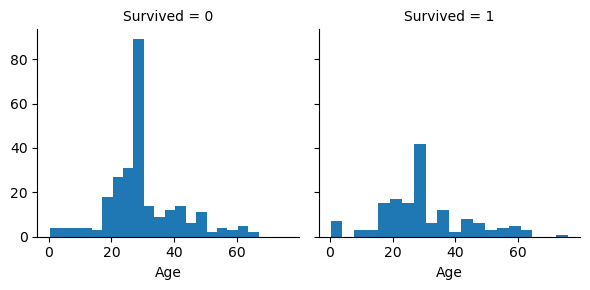

In [150]:
g = sn.FacetGrid(df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


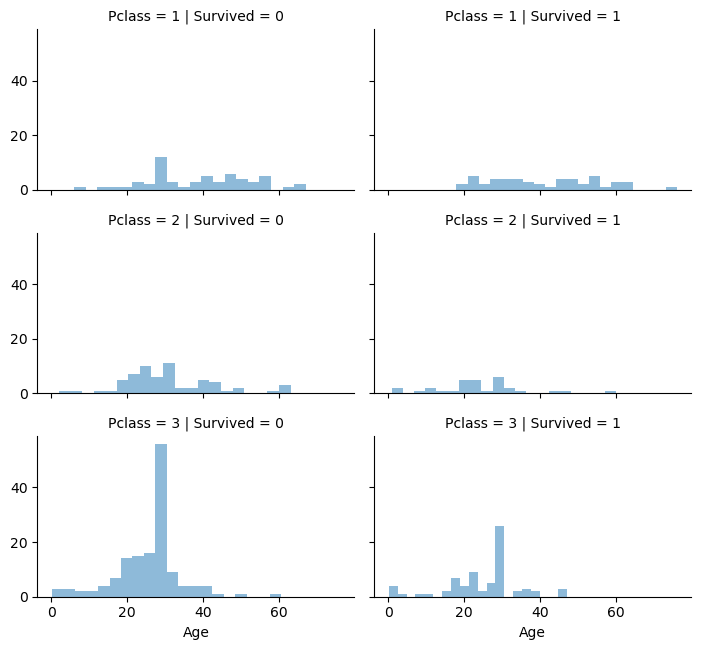

In [151]:
grid = sn.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:717: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


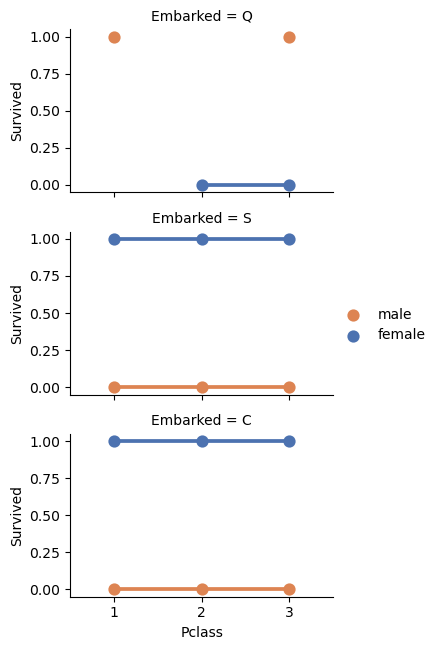

In [152]:
grid = sn.FacetGrid(df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sn.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  func(*plot_args, **plot_kwargs)
C:\ProgramData\anaco

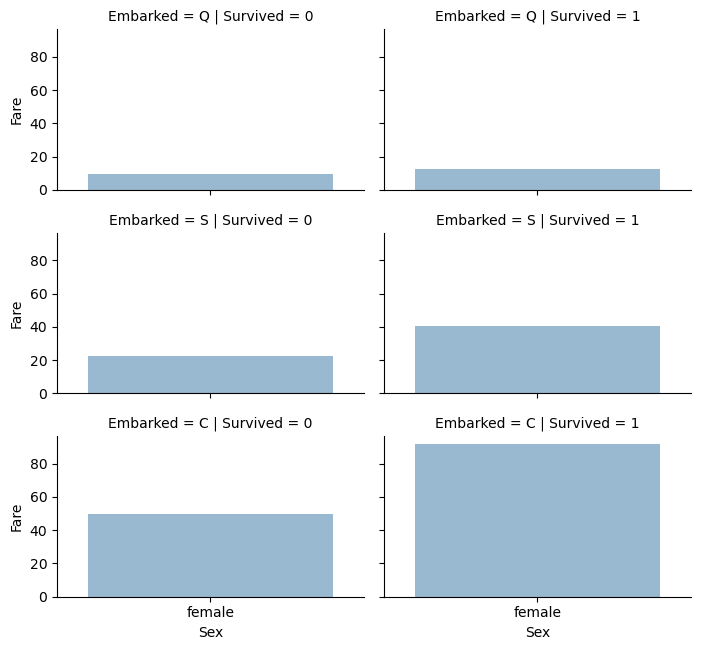

In [153]:
grid = sn.FacetGrid(df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sn.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

In [154]:
df = df.drop(['Ticket', 'Cabin'], axis=1)

KeyError: "['Ticket', 'Cabin'] not found in axis"

In [155]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.50000,0,0,7.8292,Q
1,893,1,3,female,47.00000,1,0,7.0000,S
2,894,0,2,male,62.00000,0,0,9.6875,Q
3,895,0,3,male,27.00000,0,0,8.6625,S
4,896,1,3,female,22.00000,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,male,30.27259,0,0,8.0500,S
414,1306,1,1,female,39.00000,0,0,108.9000,C
415,1307,0,3,male,38.50000,0,0,7.2500,S
416,1308,0,3,male,30.27259,0,0,8.0500,S


In [156]:
x = df.drop('Survived',axis=1)
y = df['Survived']

In [157]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [158]:
type(x)

pandas.core.frame.DataFrame

In [159]:
type(y)

pandas.core.series.Series

In [160]:
le = LabelEncoder()
x.PassengerId = le.fit_transform(x.PassengerId)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,2,2,male,62.0,0,0,9.6875,Q
3,3,3,male,27.0,0,0,8.6625,S
4,4,3,female,22.0,1,1,12.2875,S


In [161]:
y = le.fit_transform(y)
y

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [162]:
x.Pclass = le.fit_transform(x.Pclass)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,male,34.5,0,0,7.8292,Q
1,1,2,female,47.0,1,0,7.0000,S
2,2,1,male,62.0,0,0,9.6875,Q
3,3,2,male,27.0,0,0,8.6625,S
4,4,2,female,22.0,1,1,12.2875,S


In [163]:
x.Sex = le.fit_transform(x.Sex)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,34.5,0,0,7.8292,Q
1,1,2,0,47.0,1,0,7.0000,S
2,2,1,1,62.0,0,0,9.6875,Q
3,3,2,1,27.0,0,0,8.6625,S
4,4,2,0,22.0,1,1,12.2875,S


In [164]:
x.Age = le.fit_transform(x.Age)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,45,0,0,7.8292,Q
1,1,2,0,61,1,0,7.0000,S
2,2,1,1,75,0,0,9.6875,Q
3,3,2,1,34,0,0,8.6625,S
4,4,2,0,27,1,1,12.2875,S


In [165]:
x.Fare = le.fit_transform(x.Fare)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,45,0,0,24,Q
1,1,2,0,61,1,0,5,S
2,2,1,1,75,0,0,41,Q
3,3,2,1,34,0,0,34,S
4,4,2,0,27,1,1,46,S


In [166]:
x.Embarked = le.fit_transform(x.Embarked)
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,2,1,45,0,0,24,1
1,1,2,0,61,1,0,5,2
2,2,1,1,75,0,0,41,1
3,3,2,1,34,0,0,34,2
4,4,2,0,27,1,1,46,2


In [167]:
ms = MinMaxScaler()

In [168]:
x_scaled= pd.DataFrame(ms.fit_transform(x),columns=x.columns)
x_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,1.0,0.569620,0.000,0.000000,0.142012,0.5
1,0.002398,1.0,0.0,0.772152,0.125,0.000000,0.029586,1.0
2,0.004796,0.5,1.0,0.949367,0.000,0.000000,0.242604,0.5
3,0.007194,1.0,1.0,0.430380,0.000,0.000000,0.201183,1.0
4,0.009592,1.0,0.0,0.341772,0.125,0.111111,0.272189,1.0


In [169]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Pclass       418 non-null    int64
 2   Sex          418 non-null    int32
 3   Age          418 non-null    int64
 4   SibSp        418 non-null    int64
 5   Parch        418 non-null    int64
 6   Fare         418 non-null    int64
 7   Embarked     418 non-null    int32
dtypes: int32(2), int64(6)
memory usage: 23.0 KB


In [170]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [171]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((334, 8), (84, 8), (334,), (84,))

## Logistic Regression

In [172]:
model = LogisticRegression()

In [173]:
model.fit(x_train,y_train)
pred = model.predict(x_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [174]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [175]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve

In [176]:
accuracy_score(y_test,pred)

1.0

In [177]:
confusion_matrix(y_test,pred)

array([[50,  0],
       [ 0, 34]], dtype=int64)

In [178]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [179]:
probability = model.predict_proba(x_test)[:,1]

In [180]:
probability

array([0.02695638, 0.95352778, 0.02579778, 0.0255013 , 0.93841106,
       0.03072905, 0.93591798, 0.03199055, 0.94058388, 0.02473813,
       0.02944024, 0.94946083, 0.9443844 , 0.95770398, 0.02474547,
       0.03096208, 0.93264579, 0.03282859, 0.03296698, 0.02711146,
       0.02704149, 0.03391131, 0.93827026, 0.02777466, 0.94673546,
       0.93715642, 0.95667283, 0.03199941, 0.02742522, 0.02805522,
       0.02792547, 0.94370487, 0.95425749, 0.02554046, 0.93988764,
       0.02733606, 0.938284  , 0.03162218, 0.94555636, 0.04106613,
       0.9383368 , 0.94437796, 0.03211565, 0.03281633, 0.03639352,
       0.02495174, 0.95173723, 0.95287203, 0.94937263, 0.02400635,
       0.0269522 , 0.94041657, 0.93480783, 0.02666692, 0.03090125,
       0.94554546, 0.02558338, 0.02792685, 0.94214833, 0.02527736,
       0.027368  , 0.02700219, 0.95416578, 0.03005943, 0.94865646,
       0.02694265, 0.02529884, 0.02449393, 0.0357688 , 0.03547905,
       0.04004514, 0.02942505, 0.02408356, 0.95038534, 0.03672

In [181]:
fpr,tpr,threshsholds = roc_curve(y_test,probability)

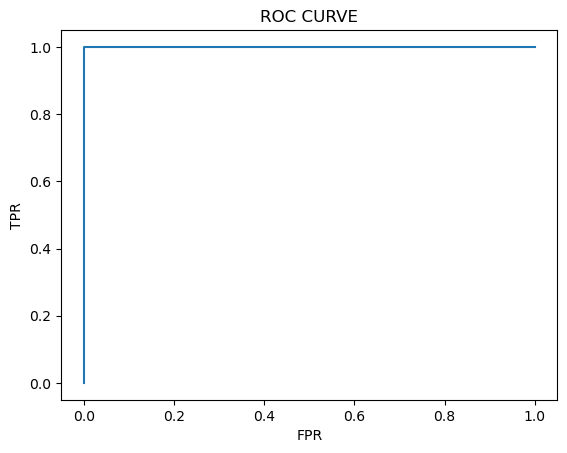

In [182]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC CURVE')
plt.show()

## Decision Tree

In [108]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [109]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [110]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [111]:
pred = dt.predict(x_test)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [112]:
y_test

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [113]:
accuracy_score(y_test,pred)

1.0

In [114]:
confusion_matrix(y_test,pred)

array([[50,  0],
       [ 0, 34]], dtype=int64)

In [115]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [116]:
probab = dt.predict_proba(x_test)[:,1]
probab

array([0., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1.])

In [117]:
fpr,tpr,threshsholds = roc_curve(y_test,probab)

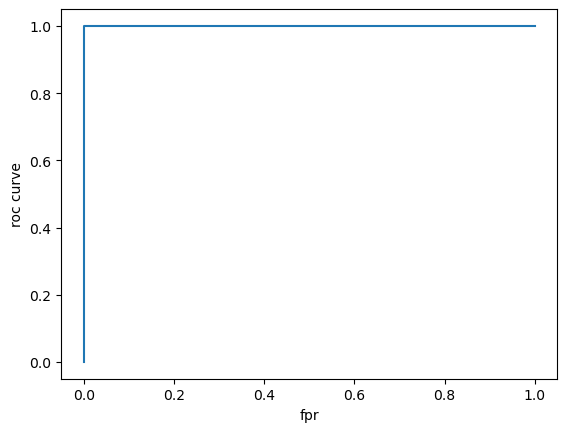

In [118]:
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('roc curve')
plt.show()

[Text(0.5, 0.75, 'x[2] <= 0.5\ngini = 0.457\nsamples = 334\nvalue = [216, 118]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 118\nvalue = [0, 118]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 216\nvalue = [216, 0]')]

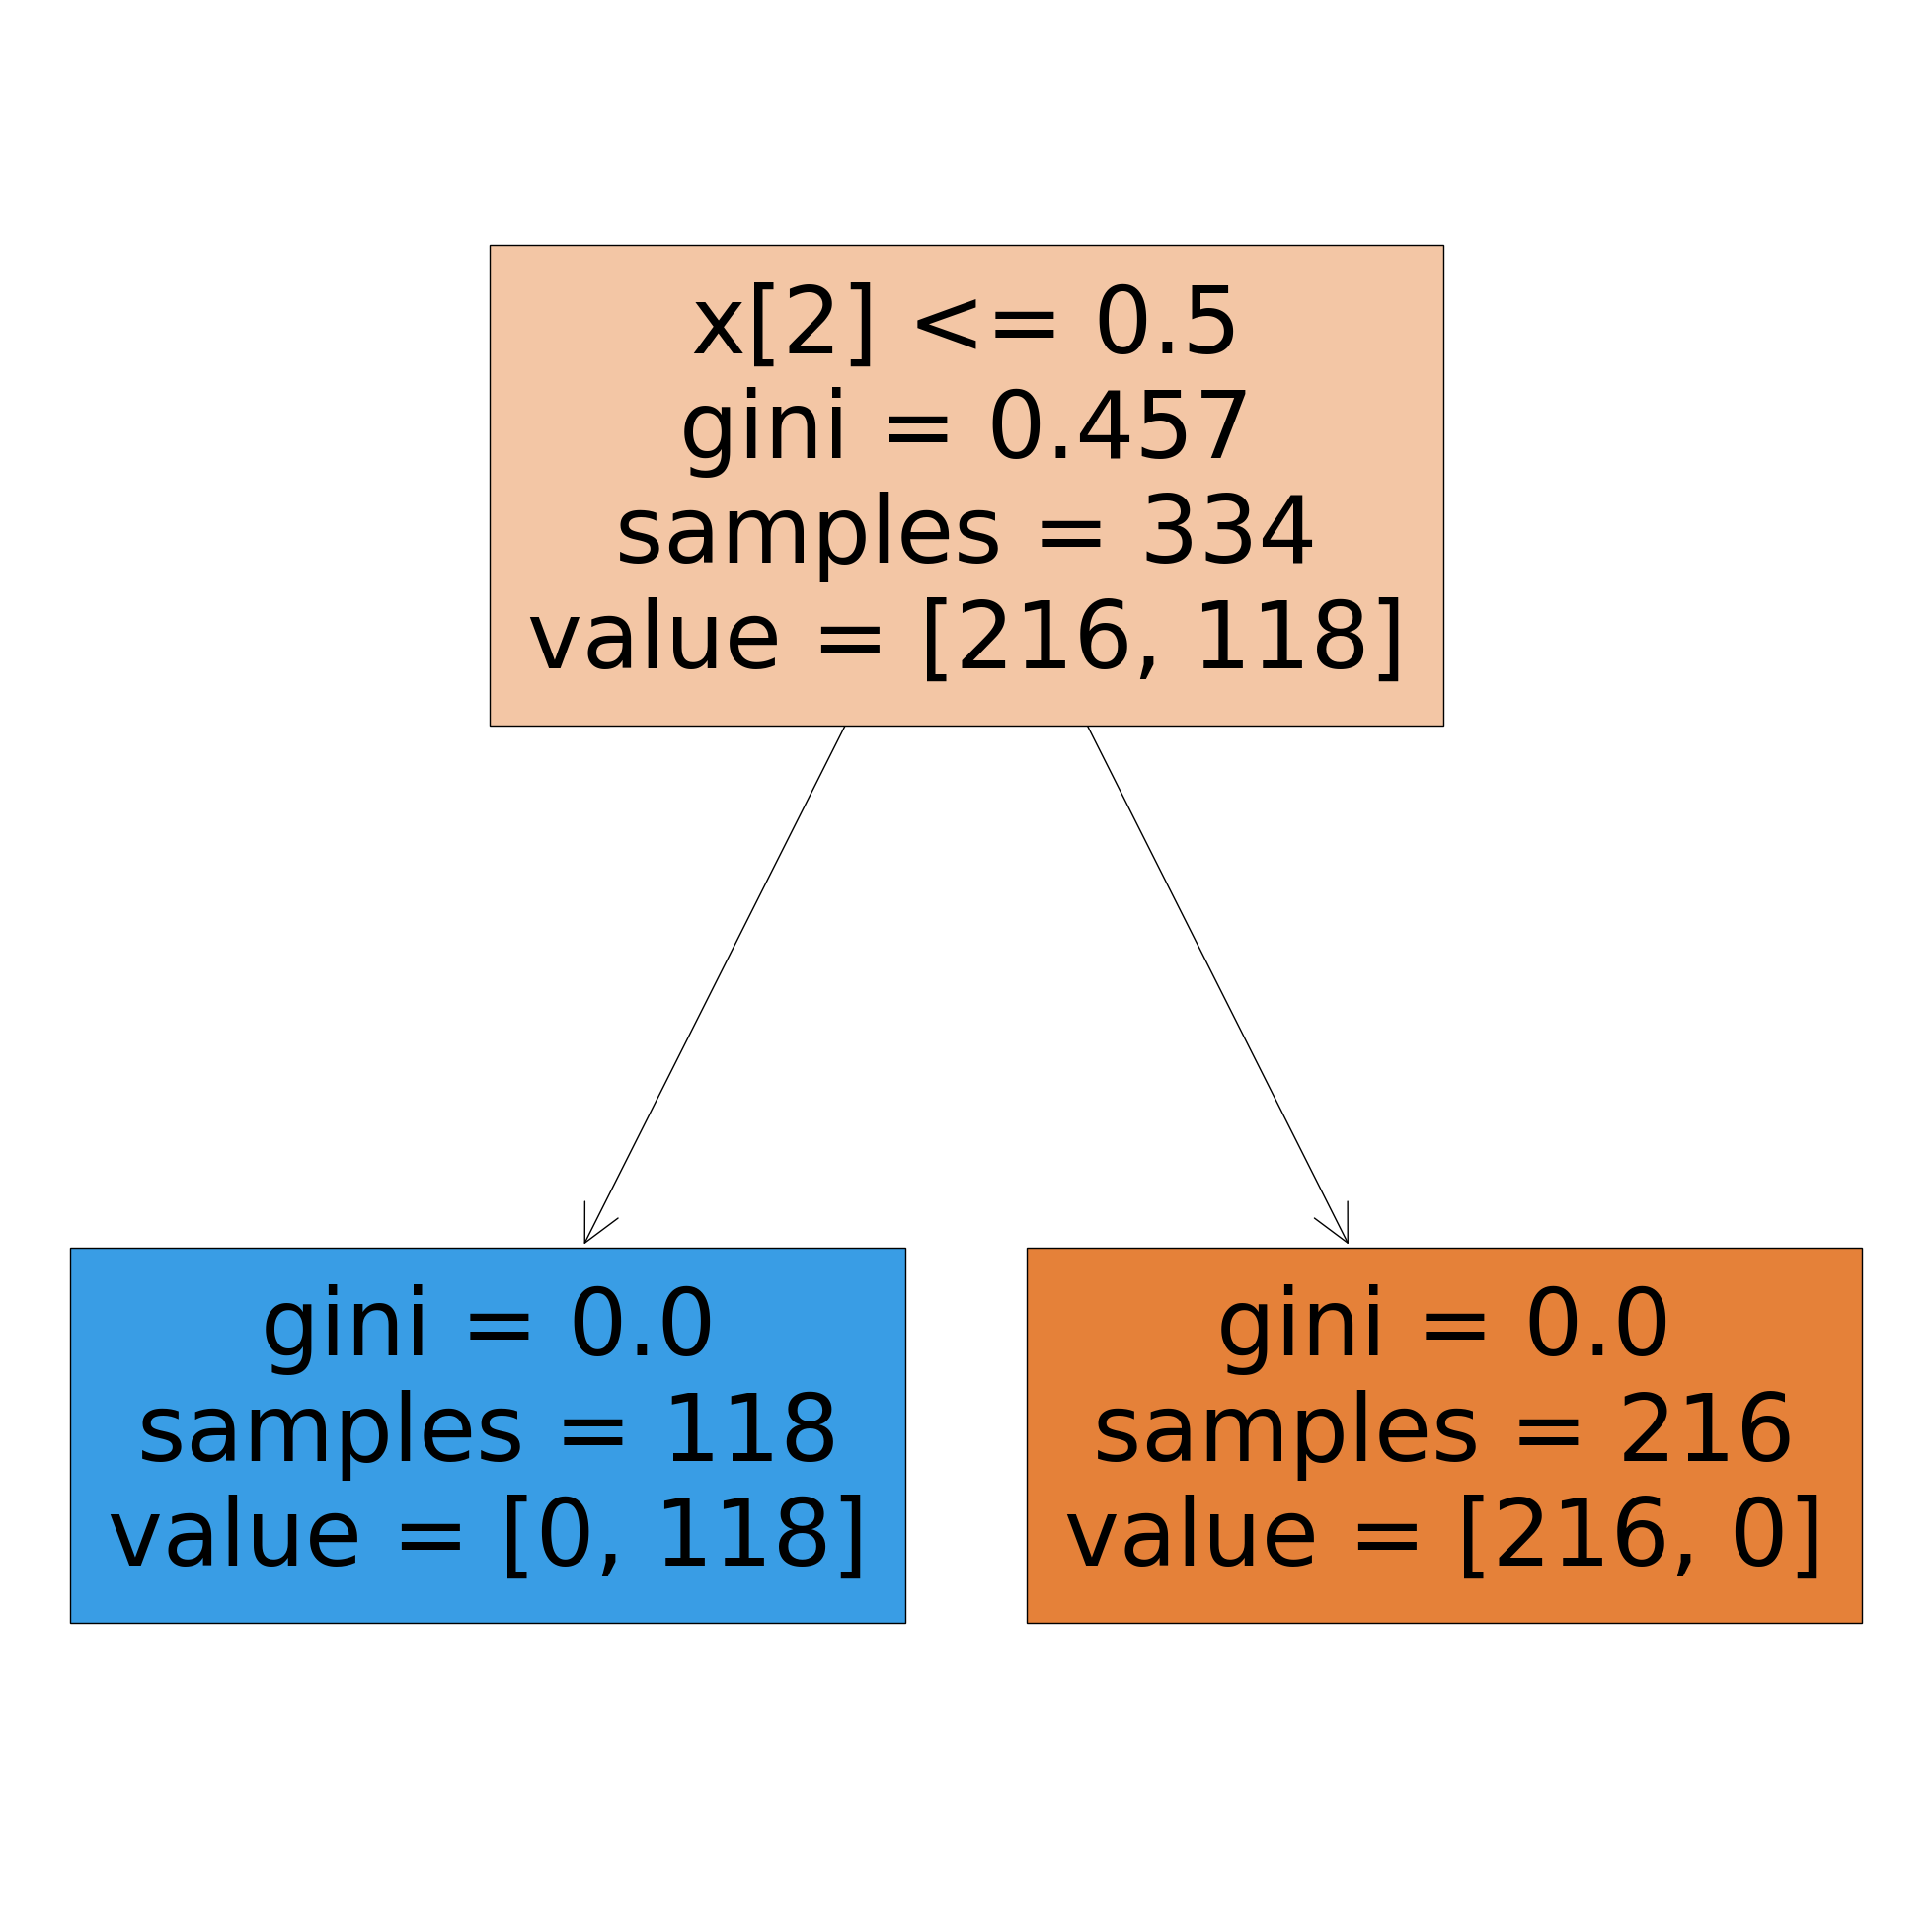

In [119]:
from sklearn import tree
plt.figure(figsize = (25,25))
tree.plot_tree(dt,filled= True)

## Naive Bayes

In [136]:
from sklearn.naive_bayes import GaussianNB

In [137]:
clf = GaussianNB()

In [138]:
clf.fit(x_train, y_train)

GaussianNB()

In [139]:
clf.score(x_test,y_test)

1.0

In [140]:
clf.score(x_train,y_train)

1.0

In [141]:
confusion_matrix(y_test,pred)

array([[50,  0],
       [ 0, 34]], dtype=int64)

In [142]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



## Random Forest

In [125]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()

In [126]:
forest_params = [{'max_depth':list(range(10,15)),'max_features': list(range(0,14))}]

In [127]:
rf_cv = GridSearchCV(rf,param_grid = forest_params,cv = 10,scoring="accuracy")
rf_cv.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
50 fits failed out of a total of 700.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
50 fits failed with the following error:
Traceback (most recent call last):
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\ProgramData\anaconda3\Lib\site-packages

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [128]:
pred = rf_cv.predict(x_test)

In [129]:
accuracy_score(y_test,pred)

1.0

In [130]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [131]:
rf_cv.best_params_

{'max_depth': 10, 'max_features': 1}

In [132]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [133]:
probabo = rf.predict_proba(x_test)[:,1]
probabo

array([0.02, 0.93, 0.04, 0.  , 0.91, 0.04, 0.9 , 0.  , 0.89, 0.08, 0.04,
       0.94, 0.88, 0.95, 0.08, 0.06, 0.84, 0.07, 0.1 , 0.07, 0.01, 0.08,
       0.85, 0.01, 0.9 , 0.88, 0.98, 0.  , 0.11, 0.03, 0.03, 0.96, 0.95,
       0.  , 0.9 , 0.  , 0.95, 0.04, 0.99, 0.18, 0.95, 0.9 , 0.02, 0.07,
       0.01, 0.  , 0.77, 0.91, 0.92, 0.01, 0.07, 0.87, 0.94, 0.  , 0.08,
       0.99, 0.  , 0.  , 0.91, 0.06, 0.04, 0.01, 0.88, 0.03, 0.96, 0.  ,
       0.01, 0.  , 0.06, 0.14, 0.12, 0.06, 0.02, 0.86, 0.  , 0.88, 0.05,
       0.93, 0.93, 0.04, 0.02, 0.88, 0.03, 0.92])

In [134]:
fpr,tpr,threshsholds = roc_curve(y_test,probabo)

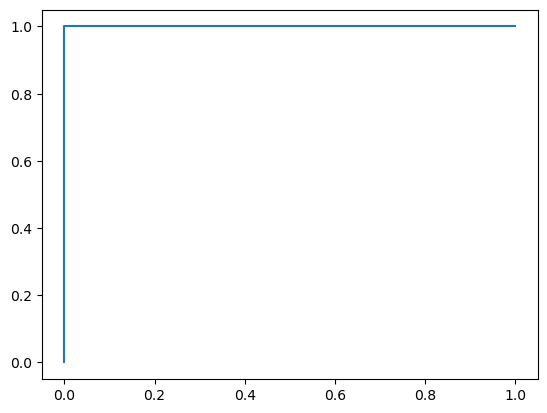

In [135]:
plt.plot(fpr,tpr)